In [34]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import scipy.stats as st

#import citipy
from citipy import citipy
# import api keys
from config import api_key

In [42]:
# Cities list from citipy
# Range for Lat and Lng
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for lat and lng plus cities
lat_lng_list = []
cities = []

lat_data = np.random.uniform(low=-90.00, high=90.00, size=1500)
lng_data = np.random.uniform(low=-180.00, high=180.00, size=1500)
lat_lng_list = zip(lat_data, lng_data)

# Use citipy to find nearest city for each random lat lng combo
for lat_lng in lat_lng_list:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)

len(cities)

611

In [43]:
url = "https://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={api_key}&q="
response = requests.get(query_url + "Indianapolis"+"&units=imperial").json()
response

{'coord': {'lon': -86.16, 'lat': 39.77},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 62.67,
  'feels_like': 55.67,
  'temp_min': 61,
  'temp_max': 64.4,
  'pressure': 1020,
  'humidity': 52},
 'visibility': 10000,
 'wind': {'speed': 10.29, 'deg': 240},
 'clouds': {'all': 90},
 'dt': 1603058967,
 'sys': {'type': 1,
  'id': 4533,
  'country': 'US',
  'sunrise': 1603022303,
  'sunset': 1603062039},
 'timezone': -14400,
 'id': 4259418,
 'name': 'Indianapolis',
 'cod': 200}

In [44]:
cities_list = []
country_list = []
cloudiness_list = []
dates = []
max_temps = []
lat_list = []
lng_list = []
humidities = []
wind_speeds = []
index_counter = 0
set_counter =1

In [45]:
print("Beginning Data Retrieval")
print("----------------------------")

url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        cities_list.append(response['name'])
        country_list.append(response['sys']['country'])
        cloudiness_list.append(response['clouds']['all'])
        dates.append(response['dt'])
        max_temps.append(response['main']['temp_max'])
        lat_list.append(response['coord']['lat'])
        lng_list.append(response['coord']['lon'])
        humidities.append(response['main']['humidity'])
        wind_speeds.append(response['wind']['speed'])
        if index_counter > 49:
            index_counter = 0
            set_counter += 1
        else:
            index_counter += 1
        print(f"Processing Record {index_counter} of Set {set_counter} | {city}")
    except (KeyError, IndexError):
        print("City not found. Skipping...")
    
    time.sleep(1)
print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")

Beginning Data Retrieval
----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | souillac
Processing Record 3 of Set 1 | nuuk
Processing Record 4 of Set 1 | longyearbyen
Processing Record 5 of Set 1 | saldanha
Processing Record 6 of Set 1 | vila franca do campo
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | upernavik
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 11 of Set 1 | barrow
Processing Record 12 of Set 1 | luderitz
Processing Record 13 of Set 1 | inirida
Processing Record 14 of Set 1 | bosaso
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | sorland
Processing Record 17 of Set 1 | cape canaveral
Processing Record 18 of Set 1 | butaritari
Processing Record 19 of Set 1 | baykit
Processing Record 20 of Set 1 | talnakh
Processing Record 21 of Set 1 | guerrero negro
Processing Record 22 of Set 1 | bluff
Processing 

City not found. Skipping...
Processing Record 31 of Set 4 | nova odesa
Processing Record 32 of Set 4 | pisco
Processing Record 33 of Set 4 | koutiala
Processing Record 34 of Set 4 | ostrovnoy
Processing Record 35 of Set 4 | panzhihua
Processing Record 36 of Set 4 | sola
Processing Record 37 of Set 4 | chapais
Processing Record 38 of Set 4 | puerto rico
Processing Record 39 of Set 4 | sri aman
Processing Record 40 of Set 4 | hit
Processing Record 41 of Set 4 | soria
Processing Record 42 of Set 4 | yuryuzan
Processing Record 43 of Set 4 | noumea
Processing Record 44 of Set 4 | caraubas
Processing Record 45 of Set 4 | nanortalik
City not found. Skipping...
Processing Record 46 of Set 4 | cairns
Processing Record 47 of Set 4 | kawalu
Processing Record 48 of Set 4 | tateyama
Processing Record 49 of Set 4 | chuy
Processing Record 50 of Set 4 | quatre cocos
Processing Record 0 of Set 5 | port elizabeth
Processing Record 1 of Set 5 | botwood
Processing Record 2 of Set 5 | chokurdakh
Processing

City not found. Skipping...
Processing Record 16 of Set 8 | gus-zheleznyy
Processing Record 17 of Set 8 | tezu
Processing Record 18 of Set 8 | tanout
Processing Record 19 of Set 8 | ishinomaki
Processing Record 20 of Set 8 | kutum
Processing Record 21 of Set 8 | piacabucu
Processing Record 22 of Set 8 | harper
Processing Record 23 of Set 8 | marienburg
Processing Record 24 of Set 8 | tsumeb
Processing Record 25 of Set 8 | umm lajj
Processing Record 26 of Set 8 | nyandoma
Processing Record 27 of Set 8 | saint-georges
Processing Record 28 of Set 8 | spirit river
Processing Record 29 of Set 8 | boueni
Processing Record 30 of Set 8 | puerto baquerizo moreno
City not found. Skipping...
Processing Record 31 of Set 8 | vostok
Processing Record 32 of Set 8 | bom jesus da lapa
Processing Record 33 of Set 8 | tortoli
Processing Record 34 of Set 8 | massakory
Processing Record 35 of Set 8 | la ronge
Processing Record 36 of Set 8 | pochutla
Processing Record 37 of Set 8 | geraldton
Processing Reco

----------------------------
Data Retrieval Complete
----------------------------


In [46]:
print(len(cities_list))
print(len(country_list))
print(len(country_list))
print(len(cloudiness_list))
print(len(dates))
print(len(max_temps))
print(len(lat_list))
print(len(lng_list))
print(len(humidities))
print(len(wind_speeds))

555
555
555
555
555
555
555
555
555
555


In [47]:
city_weather_df = pd.DataFrame({
    "City": cities_list,
    "Country": country_list,
    "Cloudiness": cloudiness_list,
    "Dates": dates,
    "Max Temperature": max_temps,
    "Latitude": lat_list,
    "Longitude": lng_list,
    "Humidity": humidities,
    "Wind Speed": wind_speeds
})
city_weather_df

,City,Country,Cloudiness,Dates,Max Temperature,Latitude,Longitude,Humidity,Wind Speed
0,Rikitea,PF,100,1603058953,74.86,-23.12,-134.97,80,17.58
1,Souillac,MU,20,1603059027,73.40,-20.52,57.52,73,10.29
2,Nuuk,GL,45,1603059028,44.60,64.18,-51.72,75,25.28
3,Longyearbyen,SJ,20,1603059029,26.60,78.22,15.64,73,9.17
4,Saldanha,ZA,100,1603059031,57.20,-33.01,17.94,76,4.70
...,...,...,...,...,...,...,...,...,...
550,Panubigan,PH,92,1603059924,78.15,7.43,123.35,84,3.94
551,Uvarovka,RU,87,1603059925,36.19,55.53,35.61,90,12.19
552,Augusto Corrêa,BR,96,1603059926,78.44,-1.02,-46.63,78,5.21
553,Zhangye,CN,82,1603059927,41.74,38.93,100.45,53,4.76


In [48]:
city_weather_df.to_csv("../output_data/city_weather.csv", index=False)

# Plotting the Data
* Add a sentence or two after each plot explaining what the code is analyzing.

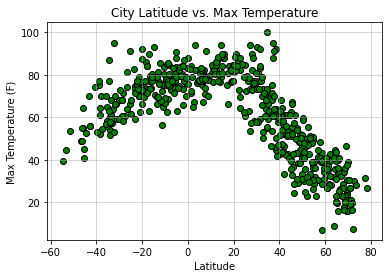

In [52]:
# Scatter Plot for Termperature (F) vs Latitude
plt.scatter(city_weather_df["Latitude"], city_weather_df["Max Temperature"], facecolor="g", edgecolor='black')

# Set labels
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

# Add grid lines
plt.grid(linestyle='-', linewidth=1, alpha=0.5)

plt.savefig('../output_data/lat_maxtemp_graph.png')